TASK-4

CODSOFT

Import necessary library

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import sklearn.metrics as sm

Load data

In [4]:
adv=pd.read_csv(r'/content/advertising.csv')

In [5]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Check shape

In [8]:
adv.shape

(200, 4)

In [9]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Data Manipulation

In [16]:
adv.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

Check null value

In [12]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [83]:
adv= adv.dropna()
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [15]:
adv.duplicated().sum()

0

In [17]:
adv.isnull().sum()*100/len(adv)

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [19]:
adv.value_counts()

TV     Radio  Newspaper  Sales
0.7    39.6   8.7        1.6      1
206.9  8.4    26.4       17.9     1
197.6  3.5    5.9        16.7     1
       23.3   14.2       16.6     1
198.9  49.4   60.0       23.7     1
                                 ..
97.5   7.6    7.2        13.7     1
100.4  9.6    3.6        10.7     1
102.7  29.6   8.4        14.0     1
104.6  5.7    34.4       10.4     1
296.4  36.3   100.9      23.8     1
Name: count, Length: 200, dtype: int64

VISUALIZATION

BOXPLOT

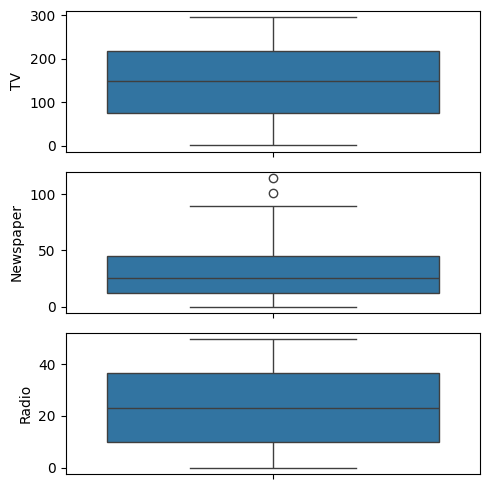

In [21]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(adv['TV'], ax = axs[0])
plt2 = sns.boxplot(adv['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(adv['Radio'], ax = axs[2])
plt.tight_layout()

EDA

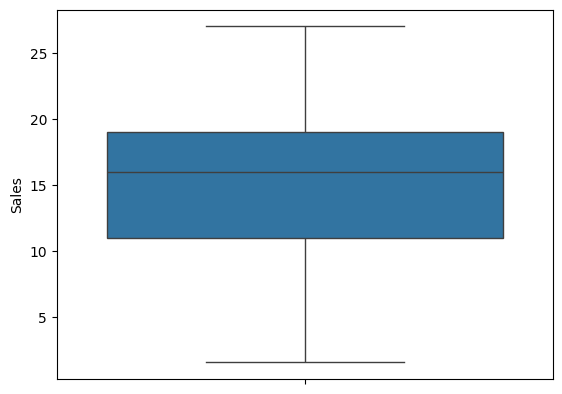

In [22]:
sns.boxplot(adv['Sales'])
plt.show()

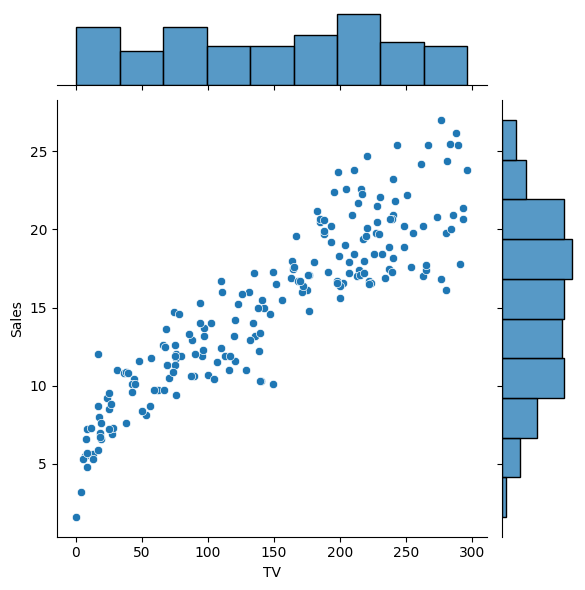

In [78]:
jointplot=sns.jointplot(x='TV',y='Sales',data=adv)

PAIRPLOT

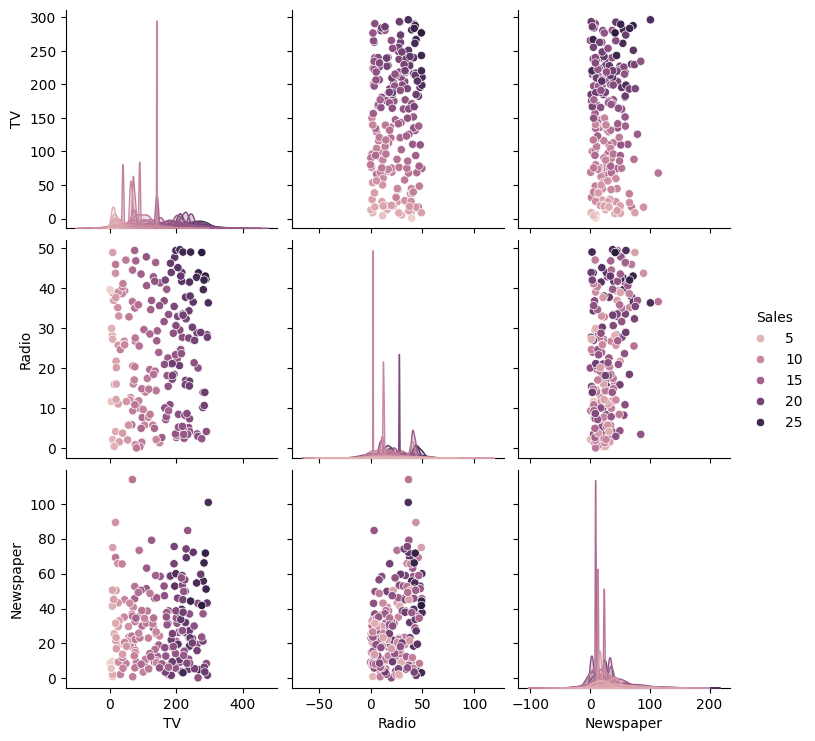

In [24]:
pairplot=sns.pairplot(adv,hue='Sales')

HISTOGRAM

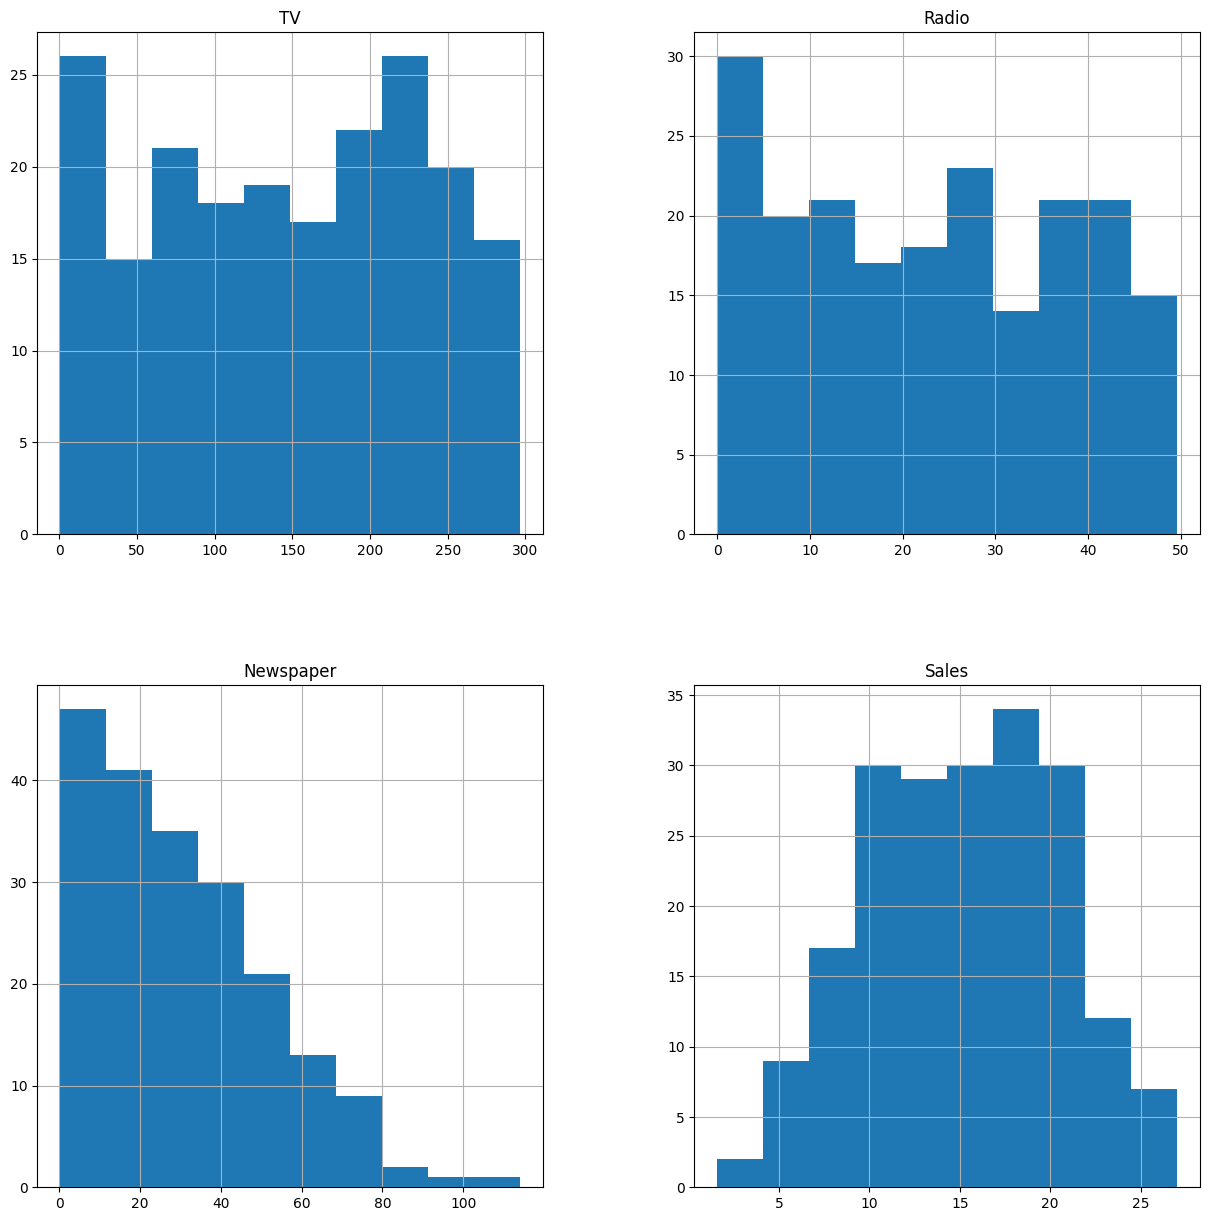

In [26]:
hist=adv.hist(figsize=(15,15))

HEATMAP

<Axes: >

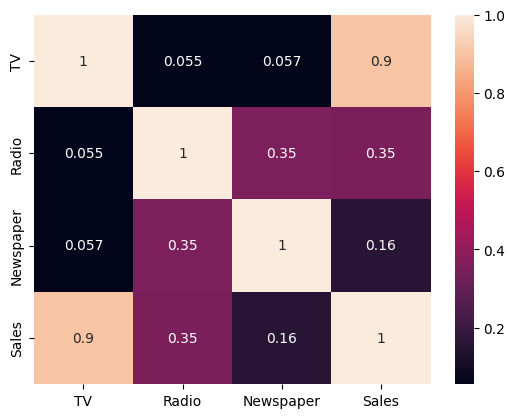

In [27]:
sns.heatmap(adv.corr(),annot=True)

<Axes: >

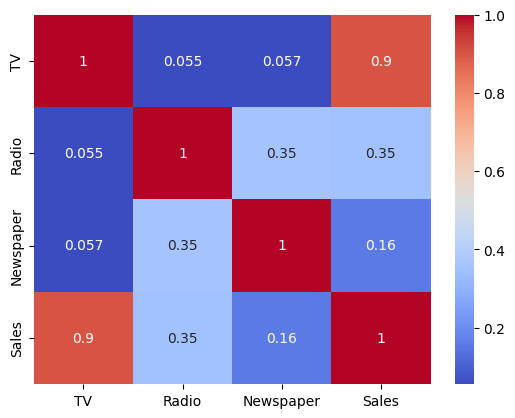

In [28]:
sns.heatmap(adv.corr(),annot=True,cmap='coolwarm')

SCATTERPLOT

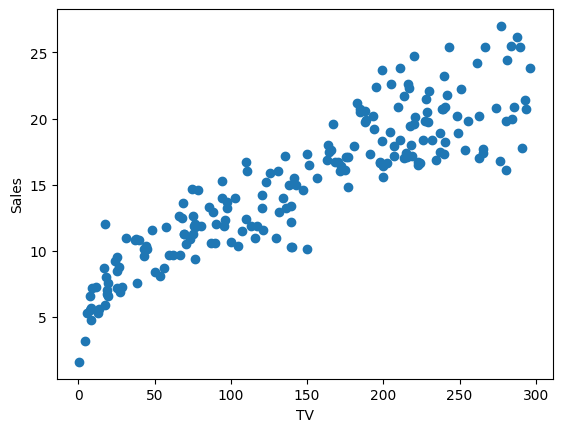

In [50]:
plt.scatter(adv['TV'],adv['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Model Building

Seperate x and y

In [29]:
x=adv.drop(['Sales'],axis=1)
y=adv['Sales']

In [63]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train.head()

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [33]:
y_train.head()

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
Name: Sales, dtype: float64

In [43]:
import statsmodels.api as sm

In [44]:
x_train_sm=sm.add_constant(x_train)

In [45]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [46]:
lr.params

const        4.773205
TV           0.053680
Radio        0.111526
Newspaper   -0.003512
dtype: float64

OLS REGRESSION DETAILS

In [49]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     547.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.52e-82
Time:                        11:58:09   Log-Likelihood:                -292.52
No. Observations:                 160   AIC:                             593.0
Df Residuals:                     156   BIC:                             605.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7732      0.320     14.903      0.0

In [56]:
threshold = y_train.mean()
y_train_categorical = (y_train > threshold).astype(int)

LOGISTIC REGRESSION

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train_categorical)

LogisticRegression()

In [75]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

218.22999999999996
14.772609789742635


LINEAR REGRESSION

In [69]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=linear_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

2.9077569102710896
1.7052146229349223


SUPPORT VECTOR REGRESSOR

In [95]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [99]:
y_pred_svc = svr.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, y_pred_svc)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svc)
print("Support Vector Regressor Mean Squared Error:", mse)
print("Support Vector Regressor Root Mean Squared Error:", rmse)
print("Support Vector Regressor R-squared:", r2)

Support Vector Regressor Mean Squared Error: 3.499087197255254
Support Vector Regressor Root Mean Squared Error: 1.8705847206836834
Support Vector Regressor R-squared: 0.886764963148391


GAUSSIAN NAIVE BAYES ALGORITHM

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
nb = GaussianNB()
nb.fit(x_train, y_train_encoded)

GaussianNB()

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

all_labels = np.unique(np.concatenate((y_train, y_test)))
label_encoder.fit(all_labels)

y_train_encoded = label_encoder.transform(y_train)
nb = GaussianNB()
nb.fit(x_train, y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test_encoded, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_nb))

Naive Bayes Accuracy: 0.05
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       

XGBOOST REGRESSOR

In [117]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
y_pred_xgb = xgb.predict(x_test)

In [123]:
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost R-squared:", r2_score(y_test, y_pred_xgb))

XGBoost MSE: 1.4514290545159532
XGBoost RMSE: 1.2047526943385323
XGBoost MAE: 0.889899742603302
XGBoost R-squared: 0.953029858014247


PREDICTION

PREDICT SALES

In [77]:
new_data=pd.DataFrame({'TV':[50],'Radio':[50],'Newspaper':[50]})
predicted_sales=linear_model.predict(new_data)
print(predicted_sales)

[12.7036904]


Hence it is  good model predicted